In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import cv2
import time
from src.pool_detector import PoolDetector

In [2]:
pool_detector = PoolDetector("./models/ResNet_acc=98.48_loss=0.04981_SGD_bs=64_ep=32_wd=0.0001.pth")

In [3]:
img_names = ["zone5.jpg", "zone15.jpg", "zone24.jpg", "zone27.jpg", "zone30.jpg"]

In [4]:
def plot_boxes(img, pool_coords, box_size=40):
    for cy, cx in pool_coords:
        cv2.rectangle(
            img,
            (cx - box_size // 2, cy - box_size // 2),
            (cx + box_size // 2, cy + box_size // 2),
            (255, 0, 0),
            2,
        )
    return img

Processing image:  zone5.jpg
Elapsed time: 8.6s
[(682, 853), (380, 339), (277, 657), (172, 893)]
Processing image:  zone15.jpg
Elapsed time: 7.4s
[(758, 583)]
Processing image:  zone24.jpg
Elapsed time: 7.4s
[(297, 1312)]
Processing image:  zone27.jpg
Elapsed time: 7.4s
[(662, 136), (185, 391), (160, 1246)]
Processing image:  zone30.jpg
Elapsed time: 7.4s
[(471, 822)]


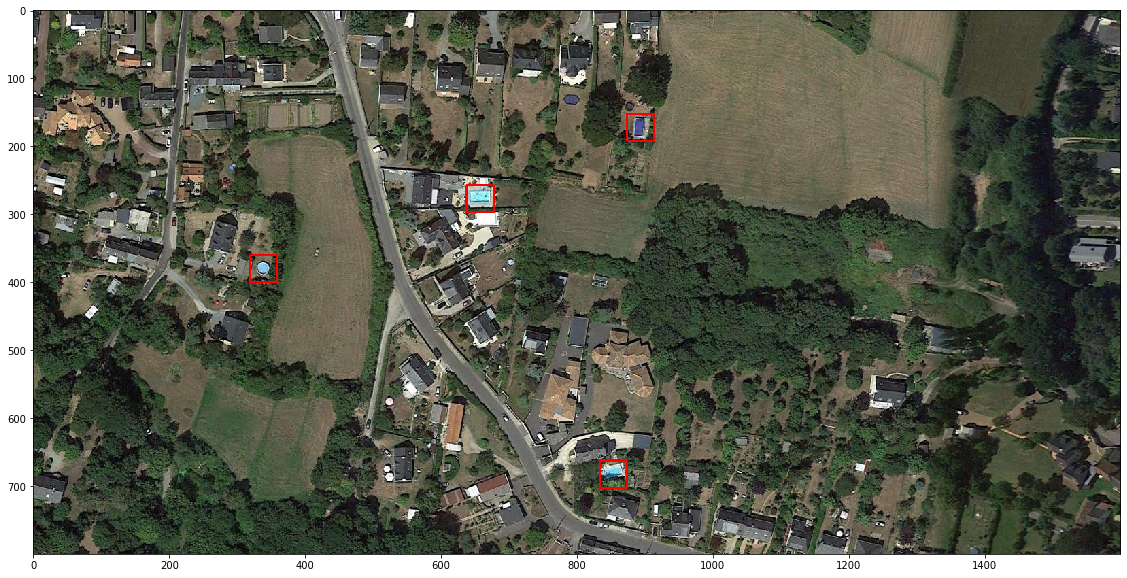

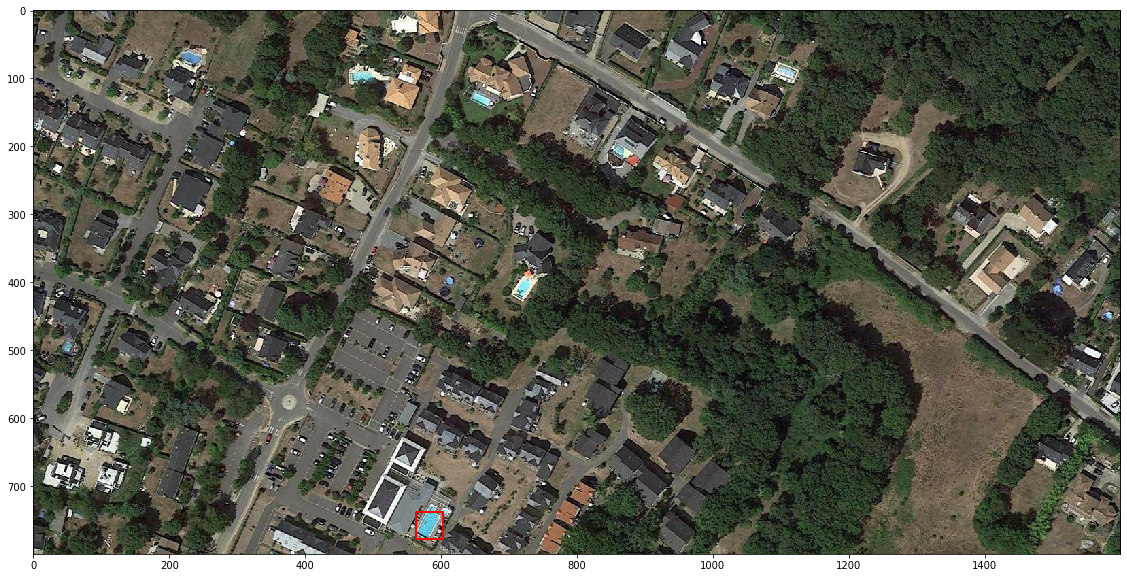

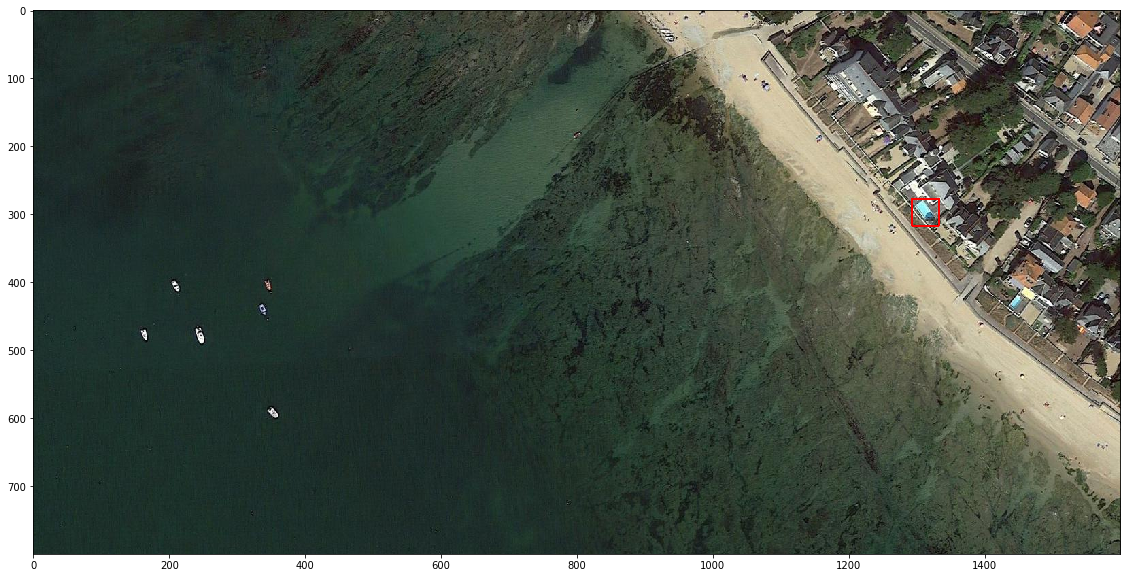

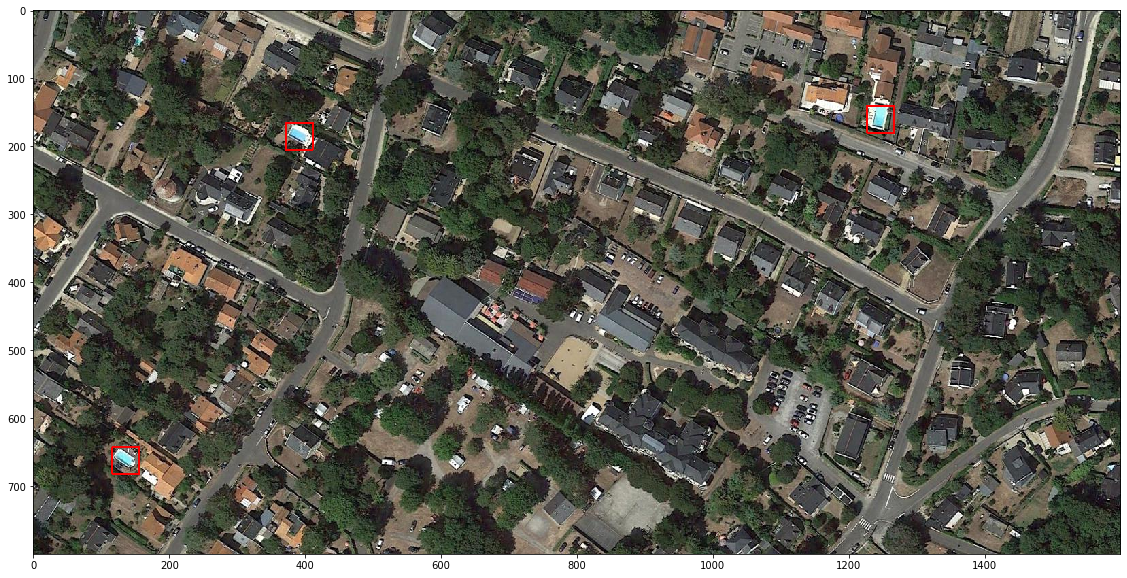

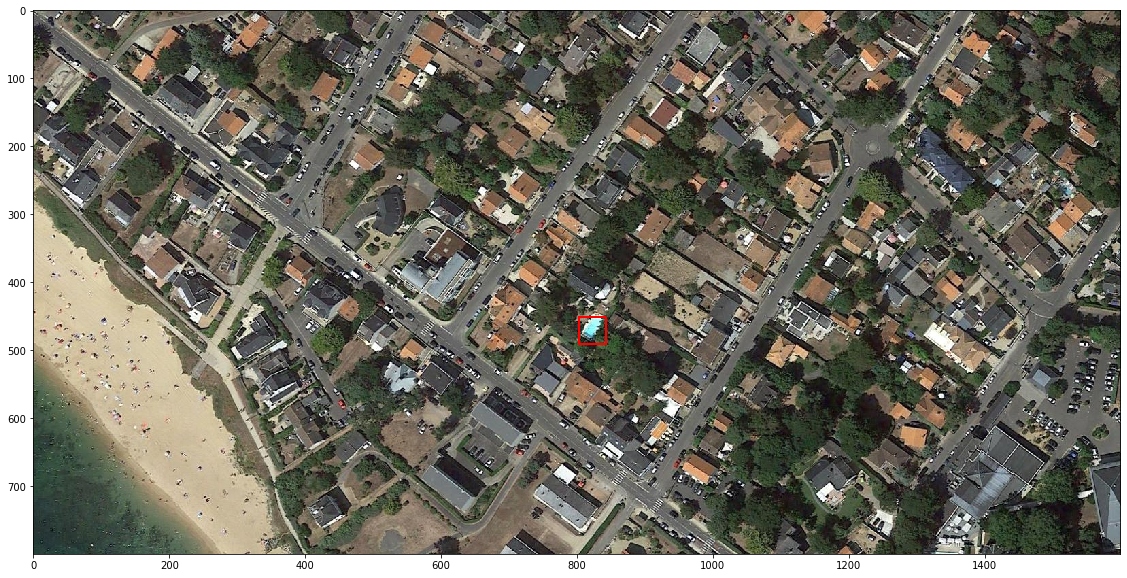

In [5]:
for img_name in img_names:
    print("Processing image: ", img_name)
    img_path = os.path.join("./data/processed/zones/", img_name)
    start = time.time()
    pool_coords = pool_detector.detect(img_path, stride=15, heatmap_thresh=170)
    print("Elapsed time: {:.1f}s".format(time.time()-start))
    print(pool_coords)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = plot_boxes(img, pool_coords)
    plt.figure(figsize=(20,10))
    plt.imshow(img)